## Housing Data Analysis using Regression Analysis
#### Farzaneh Shirzadeh

In [1]:
#Regression analysis( linear and multilinear regression)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn, sklearn.linear_model, sklearn.preprocessing, sklearn.matrics
import seaborn as sns # python data visualization library
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score

#statsmodels is an R adaptation in python to run statistical data analysis
import statsmodels.api as sm
import statsmodels.formula.api as smf

## a. A prediction model to predict housing prices (y) using any one of the available variables. 

In [2]:
housing = pd.read_excel('Housing Data.xlsx', sheet_name= 'Train set', usecols=[0,1,2,3,4])
housing.head(5)

,X1,X2,X3,X4,y
0,2622,1071,1,1,2105
1,2922,900,2,1,1740
2,4815,1125,1,1,2020
3,3546,927,0,1,1710
4,4323,909,3,0,1663


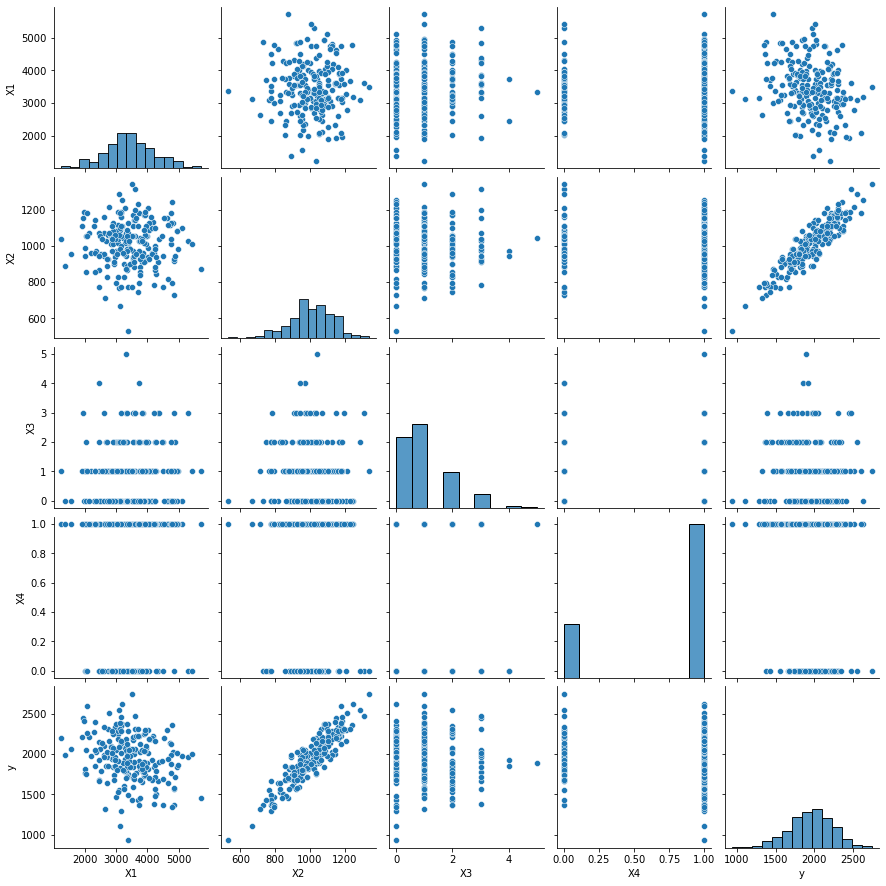

In [3]:
sns.pairplot(housing[['X1','X2','X3','X4','y']]);

C:\Users\shirz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='X1', ylabel='y'>

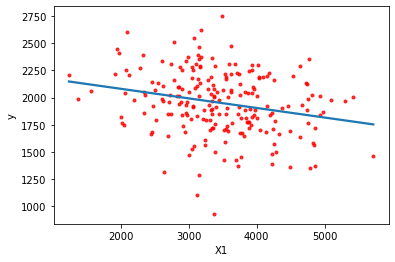

In [4]:
sns.regplot(housing.X1, housing.y, order = 1,ci= None,scatter_kws={'color':'r', 's':9})

C:\Users\shirz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='X2', ylabel='y'>

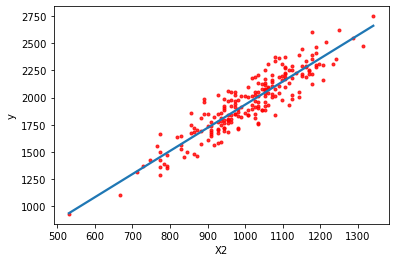

In [5]:
sns.regplot(housing.X2, housing.y, order = 1,ci= None,scatter_kws={'color':'r', 's':9})

In [6]:
regr1 = skl_lm.LinearRegression()
X = housing.X1.values.reshape(-1,1)
y = housing.y
regr1.fit(X,y)
print(regr1.intercept_)
print(regr1.coef_)

2256.739017050086
[-0.08819534]


In [7]:
y_pred = regr1.predict(X)
r2_score(y, y_pred)

0.05676837546877189

In [8]:
regr2 = skl_lm.LinearRegression()
X = housing.X2.values.reshape(-1,1)
y = housing.y
regr2.fit(X,y)
print(regr2.intercept_)
print(regr2.coef_)

-195.15436086845807
[2.12952638]


In [9]:
y_pred = regr2.predict(X)
r2_score(y, y_pred)

0.8359897060624918

## b. A prediction model to predict housing prices (y) using variables (X1, X2), based on the training set. 

In [10]:
regr_m = skl_lm.LinearRegression()

X = housing[['X1', 'X2']]
y = housing.y
regr_m.fit(X,y)
print(regr_m.coef_)
print(regr_m.intercept_)

[-0.08450792  2.12371735]
102.33358589971999


In [11]:
y_pred = regr_m.predict(X)   #y_pred

In [12]:
r2_score(y, y_pred) 

0.8881041601425701

In [13]:
est = smf.ols('y ~ X1 + X2 ', housing).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     845.3
Date:                Sat, 08 Jul 2023   Prob (F-statistic):          5.00e-102
Time:                        13:27:47   Log-Likelihood:                -1295.3
No. Observations:                 216   AIC:                             2597.
Df Residuals:                     213   BIC:                             2607.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    102.3336     61.925      1.653      0.100     -19.730     224.397
X1            -0.0845      0.008     -9.960      0.000      -0.101      -0.068
X2             2.1237      0.053     39.781      0.000       2.018       2.229
==============================================================================
Omnibus:                        0.324   Durbin-Watson:                   2.319
Prob(Omnibus):                  0.850   Jarque-Bera (JB):                0.474
Skew:                          -0.015   Prob(JB):                        0.789
Kurtosis:                       2.773   Cond. No.                     3.41e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.41e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
est = smf.ols('y ~ X1', housing).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     12.88
Date:                Sat, 08 Jul 2023   Prob (F-statistic):           0.000412
Time:                        13:27:47   Log-Likelihood:                -1525.5
No. Observations:                 216   AIC:                             3055.
Df Residuals:                     214   BIC:                             3062.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2256.7390     86.978     25.946      0.000    2085.296    2428.182
X1            -0.0882      0.025     -3.589      0.000      -0.137      -0.040
==============================================================================
Omnibus:                        5.931   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                5.761
Skew:                          -0.321   Prob(JB):                       0.0561
Kurtosis:                       3.478   Cond. No.                     1.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## c. Which of the two models shows better performance over the training set? 



The first model (y=aX1+b) has an R-squared value of 0.057 and an adjusted R-squared value of 0.052, indicating a weaker performance over the training set compared to the second model (y=aX1+bX2+c), which has a higher R-squared value of 0.888 and an even higher adjusted R-squared value of 0.887, showing better performance over the training set. In addition to this, The p-values for X1 and X2 are less than 0.05, indicating that they are significant predictors of y. Finally, an examination of the scatter plot for y=aX1+b shows a lack of a strong linear correlation between X1 and y.

## d. What criteria did you use to determine this?


To determine the strength of the linear relationship between X1 , X2 and y, I used a combination of the scatter plot and values from the table such as p-value, R-squared, and Adj. R-squared. The scatter plot provides a visual representation of the relationship between the variables, while the statistical values from the table provide quantitative measures of the strength and significance of the relationship.

## 2.Model Evaluation and Selection
## a. Apply both of the linear regression models from the previous question on the test set. 


In [15]:
housing = pd.read_excel('Housing Data.xlsx', sheet_name= 'Test set', usecols=[0,1,2,3,4])
housing.head(5)

,X1,X2,X3,X4,y
0,4203,1125,0,1,2212
1,2676,963,3,0,1982
2,3165,1170,1,1,2314
3,3471,1053,0,1,2240
4,4461,1080,0,1,2034


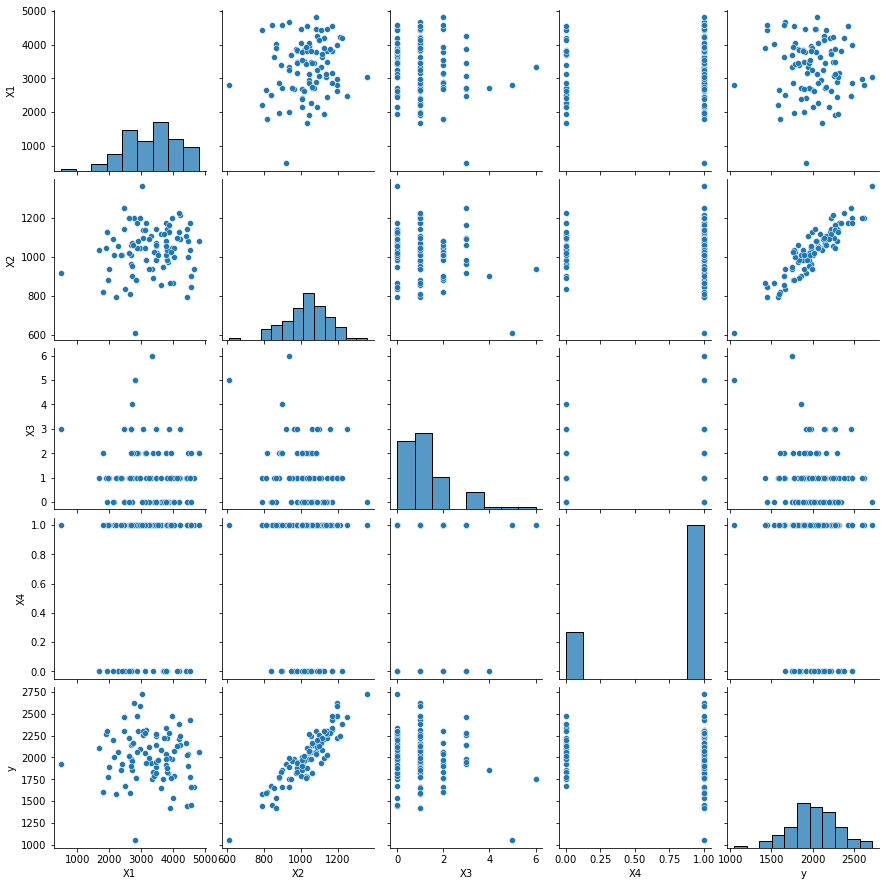

In [16]:
sns.pairplot(housing[['X1','X2','X3','X4','y']]);

In [17]:
regr1 = skl_lm.LinearRegression()
X = housing.X1.values.reshape(-1,1)
y = housing.y
regr1.fit(X,y)
print(regr1.intercept_)
print(regr1.coef_)

2110.945903691802
[-0.03062989]


In [18]:
y_pred = regr1.predict(X)
r2_score(y, y_pred)

0.007861554541611748

In [19]:
regr1 = skl_lm.LinearRegression()
X = housing.X2.values.reshape(-1,1)
y = housing.y
regr1.fit(X,y)
print(regr1.intercept_)
print(regr1.coef_)

-244.29518703885856
[2.18236343]


In [20]:
y_pred = regr1.predict(X)
r2_score(y, y_pred)

0.8400605605938344

In [21]:
regr_m = skl_lm.LinearRegression()

X = housing[['X1', 'X2']]
y = housing.y
regr_m.fit(X,y)
print(regr_m.coef_)
print(regr_m.intercept_)

[-0.07450069  2.25133296]
-68.6193326350674


In [22]:
y_pred = regr_m.predict(X)   #y_pred

In [23]:
r2_score(y, y_pred)

0.8857306687649842

In [24]:
est = smf.ols('y ~ X1 + X2', housing).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     352.7
Date:                Sat, 08 Jul 2023   Prob (F-statistic):           1.37e-43
Time:                        13:27:50   Log-Likelihood:                -561.88
No. Observations:                  94   AIC:                             1130.
Df Residuals:                      91   BIC:                             1137.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -68.6193     92.418     -0.742      0.460    -252.196     114.958
X1            -0.0745      0.012     -6.031      0.000      -0.099      -0.050
X2             2.2513      0.085     26.441      0.000       2.082       2.420
==============================================================================
Omnibus:                        1.875   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.314
Skew:                          -0.254   Prob(JB):                        0.518
Kurtosis:                       3.277   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
est = smf.ols('y ~ X1', housing).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.7290
Date:                Sat, 08 Jul 2023   Prob (F-statistic):              0.395
Time:                        13:27:50   Log-Likelihood:                -663.46
No. Observations:                  94   AIC:                             1331.
Df Residuals:                      92   BIC:                             1336.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2110.9459    122.452     17.239      0.000    1867.746    2354.146
X1            -0.0306      0.036     -0.854      0.395      -0.102       0.041
==============================================================================
Omnibus:                        3.618   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.164   Jarque-Bera (JB):                3.162
Skew:                          -0.270   Prob(JB):                        0.206
Kurtosis:                       3.718   Cond. No.                     1.43e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### b. Which of the two models shows better performance over the test set (name the criteria you used to determine this)? 

The first model (y=aX1+b) has a low R-squared value of 0.008 and a negative adjusted R-squared value of -0.003, which indicates a weak performance on the test set in comparison to the second model (y=aX1+bX2+c). The second model shows better performance with a higher R-squared value of 0.886 and an adjusted R-squared value of 0.883. Additionally, the p-values for X1 and X2 are less than 0.05, signifying that they are significant predictors of y. 

To evaluate the linear relationship between X1, X2, and y, I combined the use of a scatter plot and the values from the table including p-value, R-squared, and Adj. R-squared. The scatter plot visualizes the relationship between the variables, while the statistical values from the table provide numerical measures of the relationship's strength and significance. An examination of the scatter plot for y=aX1+b reveals a lack of strong linear correlation between X1 and y.

### 3.The real estate company downloaded data for approximately 9,100 apartments that are advertised online and are located in the same region. All these records appear in the "rollout" tab in the attached Excel sheet, but do not include the price. Apply the model you selected in the last question and use it to predict the price for all of the apartments whose details appear in the “rollout" tab. 

In [26]:
housing = pd.read_excel('Housing Data.xlsx', sheet_name= 'Rollout data', usecols=[0,1,2,3,4])
housing.head(5)

,X1,X2,X3,X4,y
0,3651,738,1,1,NaN
1,3456,1008,1,1,NaN
2,3636,1170,1,1,NaN
3,2115,1017,2,1,NaN
4,3282,999,0,1,NaN


In [27]:
import numpy as np
from sklearn import linear_model as skl_lm

# Load the training data from the excel file into a pandas dataframe
df = pd.read_excel('Housing Data.xlsx', sheet_name= 'Rollout data', usecols=[0,1,2,3,4])

#predict the y using x1, x2 values in the test data set
X = df[['X1', 'X2']]
df['y'] = regr_m.predict(X)   #y_pred
df

,X1,X2,X3,X4,y
0,3651,738,1,1,1320.862372
1,3456,1008,1,1,1943.249906
2,3636,1170,1,1,2294.555721
3,2115,1017,2,1,2063.417328
4,3282,999,0,1,1935.951029
...,...,...,...,...,...
9095,2580,1269,0,1,2596.110413
9096,4221,1026,1,1,1926.780871
9097,4539,1152,1,1,2186.757605
9098,2940,1017,0,1,2001.954259
